In [1]:
import os
from PIL import Image
from torchvision import transforms, datasets
import torch
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset

import torchvision

import matplotlib.pyplot as plt

import torch.optim as optim

import numpy as np

from dataset import ImageDataset

from utils import class_imbalance, imshow

from sklearn.model_selection import KFold
import random

from model import ResNet_pt

torch.manual_seed(42)

%load_ext autoreload
%autoreload 2

import pickle

import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## Carregando os dados utilizando o custom Dataset

In [15]:
device = torch.device("cpu")


foldperf = pickle.load(open('foldperf.pkl', 'rb'))

foldperf_balanced = pickle.load(open('output/foldperf_balanced.pkl', 'rb'))

In [20]:
modelo = torch.load("k_cross_ResNet.pt")

In [21]:

torch.save(modelo.state_dict(), "k_cross_ResNet_state_dict.pt")

## Testando o modelo

In [18]:
import numpy as np

def mostra_sumario(foldperf):

    test_loss_f,train_loss_f,test_acc_f,train_acc_f=[],[],[],[]
    train_precision_f,train_recall_f,train_f1_f=[],[],[]
    test_precision_f,test_recall_f,test_f1_f=[],[],[]

    k=5
    for folder in range(1,k+1):

         train_loss_f.append(np.mean(foldperf['fold{}'.format(folder)]['train_loss']))
         test_loss_f.append(np.mean(foldperf['fold{}'.format(folder)]['test_loss']))

         train_acc_f.append(np.mean(foldperf['fold{}'.format(folder)]['train_acc']))
         test_acc_f.append(np.mean(foldperf['fold{}'.format(folder)]['test_acc']))

         train_precision_f.append(np.mean(foldperf['fold{}'.format(folder)]['train_precision']))
         test_precision_f.append(np.mean(foldperf['fold{}'.format(folder)]['test_precision']))

         train_recall_f.append(np.mean(foldperf['fold{}'.format(folder)]['train_recall']))
         test_recall_f.append(np.mean(foldperf['fold{}'.format(folder)]['test_recall']))

         train_f1_f.append(np.mean(foldperf['fold{}'.format(folder)]['train_f1']))
         test_f1_f.append(np.mean(foldperf['fold{}'.format(folder)]['test_f1']))
         
         

    print('Performance do {} fold cross validation'.format(k))     

    print(f"Average Training Loss: {np.mean(train_loss_f):.3f} \t Average Test Loss: {np.mean(test_loss_f):.3f} \t Average Training Acc: {np.mean(train_acc_f):.2f} \t Average Test Acc: {np.mean(test_acc_f):.2f}")
    print(f"Training Precision: {np.mean(train_precision_f):.3f} \t Test Precision: {np.mean(test_precision_f):.3f} \t Training Recall: {np.mean(train_recall_f):.2f} \t Test Recall: {np.mean(test_recall_f):.2f}")
    print(f"Training F1: {np.mean(train_f1_f):.3f} \t Test F1: {np.mean(test_f1_f):.3f}")



In [4]:
import matplotlib.pyplot as plt

def plota_grafos(foldperf):
      k = 5

      diz_ep = {'train_loss_ep':[],'test_loss_ep':[],'train_acc_ep':[],'test_acc_ep':[]}

      for i in range(10):
            diz_ep['train_loss_ep'].append(np.mean([foldperf['fold{}'.format(f+1)]['train_loss'][i] for f in range(k)]))
            diz_ep['test_loss_ep'].append(np.mean([foldperf['fold{}'.format(f+1)]['test_loss'][i] for f in range(k)]))
            diz_ep['train_acc_ep'].append(np.mean([foldperf['fold{}'.format(f+1)]['train_acc'][i] for f in range(k)]))
            diz_ep['test_acc_ep'].append(np.mean([foldperf['fold{}'.format(f+1)]['test_acc'][i] for f in range(k)]))

      # Create a figure with two subplots
      fig, axs = plt.subplots(1, 2, figsize=(16, 8))

      # Plot losses
      axs[0].semilogy(diz_ep['train_loss_ep'], label='Train')
      axs[0].semilogy(diz_ep['test_loss_ep'], label='Test')
      axs[0].set_xlabel('Epoch')
      axs[0].set_ylabel('Loss')
      axs[0].legend()
      axs[0].set_title('Resnet balanced loss')

      # Plot accuracies
      axs[1].semilogy(diz_ep['train_acc_ep'], label='Train')
      axs[1].semilogy(diz_ep['test_acc_ep'], label='Test')
      axs[1].set_xlabel('Epoch')
      axs[1].set_ylabel('Accuracy')
      axs[1].legend()
      axs[1].set_title('Resnet balanced accuracy')

      # Adjust the spacing between subplots
      plt.tight_layout()

      # Show the combined plot
      plt.show()
     


## Verificando o modelo normal


Performance do 5 fold cross validation
Average Training Loss: 0.023 	 Average Test Loss: 0.043 	 Average Training Acc: 99.24 	 Average Test Acc: 98.56
Training Precision: 99.239 	 Test Precision: 98.634 	 Training Recall: 99.24 	 Test Recall: 98.56
Training F1: 99.239 	 Test F1: 98.562


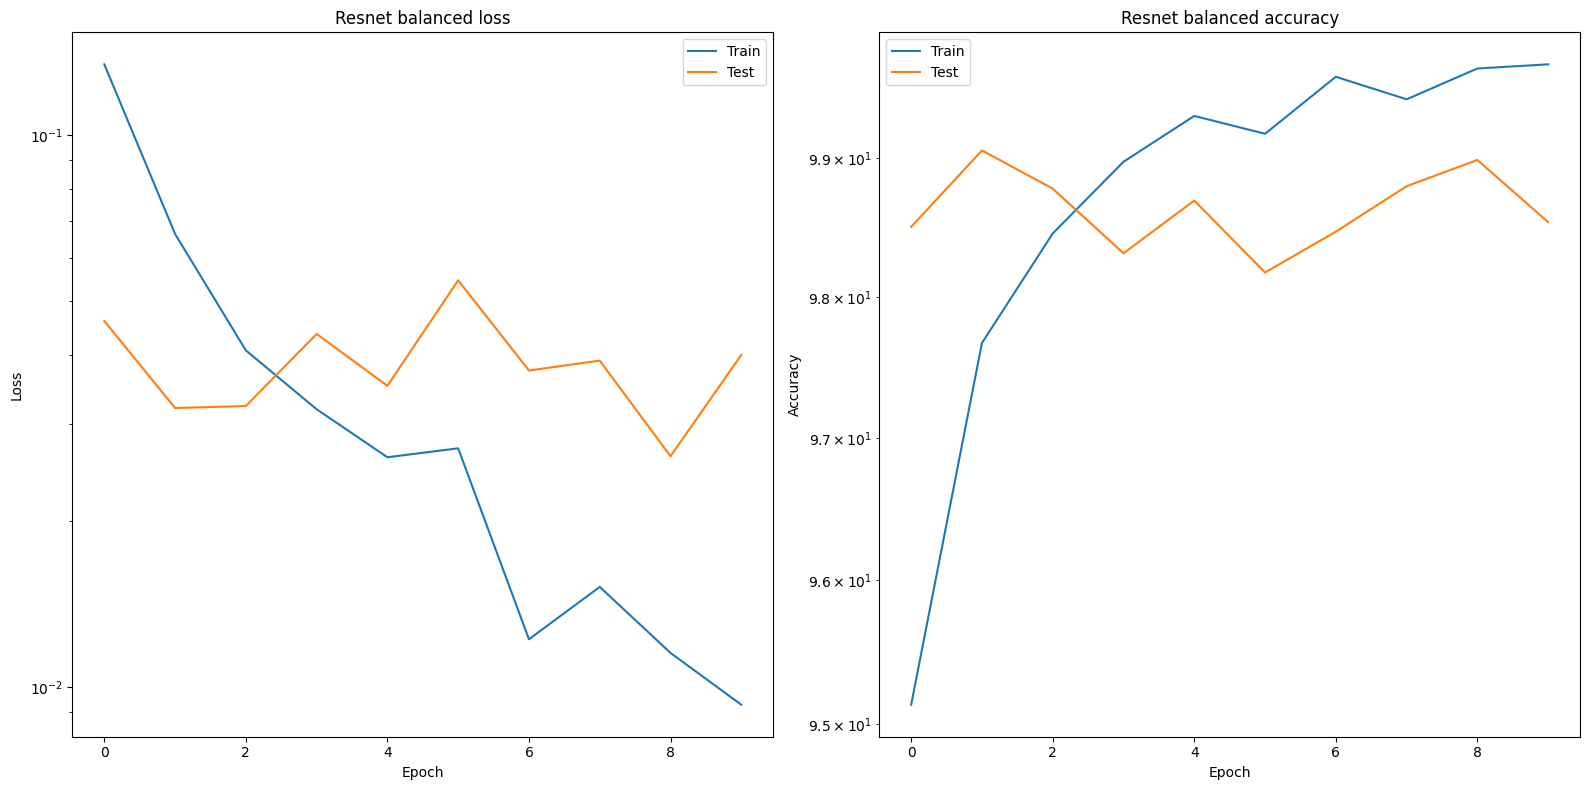

In [19]:
mostra_sumario(foldperf)

plota_grafos(foldperf)

## Verificando o modelo balanceado

In [6]:
mostra_sumario(foldperf_balanced)

plota_grafos(foldperf_balanced)

KeyError: 'train_precision'

### Conclusão: ###

Irei utilizar a Rede Neural ResNet que foi treinada sem o balanceamento dos dados pois obteve valoes melhores de Acurácia e menor loss. Embora o correto seria utilizar uma ResNet
